In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [209]:
data = pd.read_csv("auto_complectations.csv")
pd.set_option('display.max_columns', None)
data.head()

,brand,model,complect,type_car,seats,doors,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,Привод,Разгон до сотни,Максимальная скорость,Расход топлива (л/100 км)\nгород / трасса / смешанный,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
0,Audi,A3 Sedan,1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),передний,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),передний,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
2,Audi,A3 Sedan,2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),передний,6.8 секунды,250 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),полный,6.2 секунды,242 км/ч,7.2 / 4.8 / 5.7,165 мм,4458 × 1796 × 1416,2637 мм,390 л,845 л,55 л,1465 кг
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),передний,6.8 секунды,242 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг


In [210]:
data.shape

(1703, 21)

In [211]:
data.columns

Index(['brand', 'model', 'complect', 'type_car', 'seats', 'doors', 'Двигатель',
       'Мощность', 'Крутящий момент двигателя', 'Коробка передач', 'Привод',
       'Разгон до сотни', 'Максимальная скорость',
       'Расход топлива (л/100 км)\nгород / трасса / смешанный',
       'Дорожный просвет', 'Габариты (длина × ширина × высота)',
       'Колёсная база', 'Объём багажника', 'Объём багажника максимальный',
       'Объём топливного бака', 'Масса автомобиля'],
      dtype='object')

# Подготовка данных 
Разделю на разные столбцы такое колонки как: двигатель, коробка передач, расход топлива, габариты

In [212]:
data[['Тип двигателя','Объем двигателя']] = data['Двигатель'].str.split(' ', 1, expand=True)

data[['Тип КП', 'Кол-во передач']] = data['Коробка передач'].str.split(' ', 1, expand=True)

data[['Город расход', 'Трасса расход', 'Cмеш. расход']] = data['Расход топлива (л/100 км)\nгород / трасса / смешанный'].str.split('/', 2, expand=True)

data[['длина', 'ширина', 'высота']] = data['Габариты (длина × ширина × высота)'].str.split('×', 2, expand=True)   

In [213]:
data['Объем двигателя'] = [(x.lstrip('(').rstrip(')')) for x in data['Объем двигателя']]

data['Кол-во передач'] = [(x.lstrip('(').rstrip('ступеней)')) for x in data['Кол-во передач']]

In [214]:
data = data.drop(columns=['brand', 'model', 'complect', 'Двигатель', 'Коробка передач', 'Расход топлива (л/100 км)\nгород / трасса / смешанный', 'Габариты (длина × ширина × высота)', 'Объём багажника']) # удаляю все не нужные столбцы

## Преобразование переменных

In [215]:
column_dict = {'Мощность': 'л. с.', 'Крутящий момент двигателя': 'Н·м', 'Разгон до сотни': 'секунды',  'Максимальная скорость': 'км/ч', 'Дорожный просвет': 'мм','Колёсная база': 'мм',
                     'Объём багажника максимальный': 'л','Объём топливного бака': 'л', 'Масса автомобиля':'кг', 'Объем двигателя': 'см³', 'Кол-во передач': 'кол-во', 'Город расход': 'л на 100 км', 'Трасса расход': 'л на 100 км', 'Cмеш. расход': 'л на 100 км',
              'длина': 'мм', 'ширина': 'мм', 'высота': 'мм'}


def del_text(column_name, key):
    data[column] = [x.rstrip(column_dict[column]) for x in data[column]] #удаляем тектостовое значение "key"

    data[column] = pd.to_numeric(data[column],errors = 'coerce') #приводим текстовое значение к числовому   
        
    return data[column]


for column in column_dict:
    del_text(column, column_dict[column])

In [216]:
data.dtypes

type_car                         object
seats                             int64
doors                             int64
Мощность                          int64
Крутящий момент двигателя         int64
Привод                           object
Разгон до сотни                 float64
Максимальная скорость             int64
Дорожный просвет                  int64
Колёсная база                     int64
Объём багажника максимальный      int64
Объём топливного бака             int64
Масса автомобиля                  int64
Тип двигателя                    object
Объем двигателя                   int64
Тип КП                           object
Кол-во передач                    int64
Город расход                    float64
Трасса расход                   float64
Cмеш. расход                    float64
длина                             int64
ширина                            int64
высота                            int64
dtype: object

In [217]:
data.nunique()

type_car                         37
seats                             8
doors                             7
Мощность                        130
Крутящий момент двигателя       131
Привод                            3
Разгон до сотни                 111
Максимальная скорость            99
Дорожный просвет                 89
Колёсная база                   143
Объём багажника максимальный    194
Объём топливного бака            55
Масса автомобиля                423
Тип двигателя                     4
Объем двигателя                  96
Тип КП                            4
Кол-во передач                    9
Город расход                    111
Трасса расход                    62
Cмеш. расход                     84
длина                           212
ширина                          132
высота                          190
dtype: int64

In [218]:
data.head(10)

,type_car,seats,doors,Мощность,Крутящий момент двигателя,Привод,Разгон до сотни,Максимальная скорость,Дорожный просвет,Колёсная база,Объём багажника максимальный,Объём топливного бака,Масса автомобиля,Тип двигателя,Объем двигателя,Тип КП,Кол-во передач,Город расход,Трасса расход,Cмеш. расход,длина,ширина,высота
0,Седан класса C,5,4,150,250,передний,8.200,224,165,2637,880,50,1320,бензиновый,1395,роботизированная,7,5.900,4.000,4.800,4458,1796,1416
1,Седан класса C,5,4,150,250,передний,8.200,224,165,2637,880,50,1320,бензиновый,1395,роботизированная,7,5.900,4.000,4.800,4458,1796,1416
2,Седан класса C,5,4,190,320,передний,6.800,250,165,2637,880,50,1395,бензиновый,1984,роботизированная,7,7.200,4.700,5.600,4458,1796,1416
3,Седан класса C,5,4,190,320,полный,6.200,242,165,2637,845,55,1465,бензиновый,1984,роботизированная,7,7.200,4.800,5.700,4458,1796,1416
4,Седан класса C,5,4,190,320,передний,6.800,242,165,2637,880,50,1395,бензиновый,1984,роботизированная,7,7.200,4.700,5.600,4458,1796,1416
5,Седан класса C,5,4,190,320,полный,6.200,242,165,2637,845,55,1465,бензиновый,1984,роботизированная,7,7.200,4.800,5.700,4458,1796,1416
6,Хэтчбек класса B,5,5,150,250,передний,8.200,220,140,2637,1220,50,1315,бензиновый,1395,роботизированная,7,6.000,4.300,4.900,4313,1785,1426
7,Хэтчбек класса B,5,5,150,250,передний,8.200,220,140,2637,1220,50,1315,бензиновый,1395,роботизированная,7,6.000,4.300,4.900,4313,1785,1426
8,Хэтчбек класса B,5,5,190,320,передний,6.800,244,140,2637,1220,50,1390,бензиновый,1984,роботизированная,7,7.200,4.800,5.700,4313,1785,1426
9,Хэтчбек класса B,5,5,190,320,полный,6.200,236,140,2637,1180,55,1460,бензиновый,1984,роботизированная,7,7.200,4.900,5.800,4313,1785,1426


# Проверки на Nan и zero values

In [117]:
data.isnull().sum() #проверка на NaN значения

brand                             0
model                             0
complect                          0
type_car                          0
seats                             0
doors                             0
Мощность                          0
Крутящий момент двигателя         0
Привод                            0
Разгон до сотни                  71
Максимальная скорость             0
Дорожный просвет                  0
Колёсная база                     0
Объём багажника максимальный      0
Объём топливного бака             0
Масса автомобиля                  0
Тип двигателя                     0
Объем двигателя                   0
Тип КП                            0
Кол-во передач                    0
Город расход                    241
Трасса расход                   233
Cмеш. расход                     55
длина                             0
ширина                            0
высота                            0
dtype: int64

In [118]:
data[['Город расход', 'Трасса расход', 'Cмеш. расход']] = data[['Город расход', 'Трасса расход', 'Cмеш. расход']].fillna(method='ffill') # решаю заполнить NaN значения предыдущим значением
data['Разгон до сотни'] = data['Разгон до сотни'].fillna(method='ffill')
data['Максимальная скорость'] = data['Максимальная скорость'].replace(0, np.nan)

# Поиск нулевых значений и их устранение

In [119]:
data.describe() # смотрю есть ли нулевые значения

,seats,doors,Мощность,Крутящий момент двигателя,Разгон до сотни,Максимальная скорость,Дорожный просвет,Колёсная база,Объём багажника максимальный,Объём топливного бака,Масса автомобиля,Объем двигателя,Кол-во передач,Город расход,Трасса расход,Cмеш. расход,длина,ширина,высота
count,1703.000,1703.000,1703.000,1703.000,1703.000,1694.000,1703.000,1703.000,1703.000,1703.000,1703.000,1703.000,1703.000,1703.000,1703.000,1703.000,1703.000,1703.000,1703.000
mean,5.079,4.888,214.373,349.023,8.821,208.685,176.042,2802.910,1360.089,64.200,1722.112,2256.012,6.473,9.901,6.332,7.500,4696.176,1877.691,1620.228
std,0.677,1.024,102.460,161.896,2.401,28.153,47.857,170.954,947.490,14.770,364.278,856.799,2.337,3.038,1.396,1.851,303.426,93.000,165.189
min,1.000,2.000,67.000,0.000,3.200,140.000,0.000,2250.000,0.000,0.000,885.000,0.000,0.000,4.900,3.700,1.900,3595.000,1595.000,17.000
25%,5.000,4.000,150.000,213.000,7.000,186.000,155.000,2670.000,520.000,55.000,1443.000,1598.000,6.000,7.800,5.400,6.200,4447.000,1815.000,1474.000
50%,5.000,5.000,186.000,340.000,8.900,205.000,184.000,2791.000,1421.000,60.000,1685.000,1997.000,7.000,9.200,6.000,7.200,4697.000,1860.000,1630.000
75%,5.000,5.000,249.000,439.500,10.600,230.000,210.000,2923.000,1731.000,72.000,1960.000,2694.000,8.000,11.200,6.900,8.300,4933.000,1937.000,1715.000
max,9.000,8.000,639.000,900.000,17.600,322.000,291.000,3860.000,5800.000,138.000,2817.000,6592.000,10.000,20.600,11.700,14.500,5915.000,2157.000,2280.000


### Вижу такие нулевые значения как:
- крутящий момент двигателя;
- дорожный проствет;
- обьем багажника;
- Объём багажника максимальный;
- Объём топливного бака;
- Объем двигателя;
- Кол-во передач;

Как нулевого значения крутящего двигателя не бывает,так и нулевого просвета. Такие машины просто не могут ездить.

Проверю, что машины, у которых нулевой объем двигателя, это машины на электро-двигателе.

Рассмотрю нулевые значения багажников, могу предположить что, у пикапов нулевой объем багажника, если это уже другой тип машины, то скорее всего это не верные данные. 

Если есть макс. объем багажника, но в колонке `Объём багажника` нулевое значение, то я присвою макс. значение нулевому значению.

### Фильтрация данных по признаку `Крутящий момент двигателя`

In [120]:
data[data['Крутящий момент двигателя'] == 0] #эта машина дейст. имеет нулевой крутящий момент(инф. на drive.ru)

,brand,model,complect,type_car,seats,doors,Мощность,Крутящий момент двигателя,Привод,Разгон до сотни,Максимальная скорость,Дорожный просвет,Колёсная база,Объём багажника максимальный,Объём топливного бака,Масса автомобиля,Тип двигателя,Объем двигателя,Тип КП,Кол-во передач,Город расход,Трасса расход,Cмеш. расход,длина,ширина,высота
300,Chevrolet,Spark,L AT,Хэтчбек класса A,5,5,85,0,передний,12.400,161.000,145,2375,170,35,1054,бензиновый,1249,автоматическая,4,8.200,5.000,6.200,3640,1597,1522
301,Chevrolet,Spark,LS AT,Хэтчбек класса A,5,5,85,0,передний,12.400,161.000,145,2375,170,35,1054,бензиновый,1249,автоматическая,4,8.200,5.000,6.200,3640,1597,1522
302,Chevrolet,Spark,LT AT,Хэтчбек класса A,5,5,85,0,передний,12.400,161.000,145,2375,170,35,1054,бензиновый,1249,автоматическая,4,8.200,5.000,6.200,3640,1597,1522


### Фильтрация данных по признаку `Дорожный просвет`

In [121]:
data[data['Дорожный просвет'] == 0]

,brand,model,complect,type_car,seats,doors,Мощность,Крутящий момент двигателя,Привод,Разгон до сотни,Максимальная скорость,Дорожный просвет,Колёсная база,Объём багажника максимальный,Объём топливного бака,Масса автомобиля,Тип двигателя,Объем двигателя,Тип КП,Кол-во передач,Город расход,Трасса расход,Cмеш. расход,длина,ширина,высота
58,Audi,A6,40 TFSI 7AMT,Седан класса E,5,4,190,320,передний,7.900,237.000,0,2924,530,73,1680,бензиновый,1984,роботизированная,7,7.400,5.000,5.800,4933,1886,1457
59,Audi,A6,40 TDI 7AMT,Седан класса E,5,4,190,400,передний,8.400,237.000,0,2924,530,73,1710,дизельный,1968,роботизированная,7,6.200,4.600,5.200,4933,1886,1457
60,Audi,A6,Advance 40 TFSI 7AMT,Седан класса E,5,4,190,320,передний,7.900,237.000,0,2924,530,73,1680,бензиновый,1984,роботизированная,7,7.400,5.000,5.800,4933,1886,1457
61,Audi,A6,Advance 40 TDI 7AMT,Седан класса E,5,4,190,400,передний,8.400,237.000,0,2924,530,73,1710,дизельный,1968,роботизированная,7,6.200,4.600,5.200,4933,1886,1457
62,Audi,A6,45 TFSI 7AMT,Седан класса E,5,4,245,370,полный,6.000,250.000,0,2924,530,73,1770,бензиновый,1984,роботизированная,7,8.500,5.800,6.800,4933,1886,1457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,Mercedes-Benz,Maybach GLS,600 4MATIC,Большой внедорожник,5,5,557,730,полный,4.900,250.000,0,3135,2400,90,2785,бензиновый,3982,автоматическая,9,16.000,9.700,12.000,5205,2157,1838
1078,Mercedes-Benz,V,220 CDI,Вэн,7,4,163,380,задний,11.800,194.000,0,3200,1030,57,2075,дизельный,2143,механическая,6,6.800,5.000,5.700,5140,1928,1880
1079,Mercedes-Benz,V,250 BlueTEC CDI,Вэн,7,4,190,440,задний,11.800,194.000,0,3200,1030,57,2145,дизельный,2143,автоматическая,7,6.600,5.600,6.000,5140,1928,1880
1080,Mercedes-Benz,V,220 CDI Avantgarde,Вэн,7,5,163,380,задний,11.800,194.000,0,3200,1030,57,2075,дизельный,2143,механическая,6,6.800,5.000,5.700,5140,1928,1880


Действительно, данные не верны, у машины не может быть нулевого клиренса, но я не очень хочу терять эти данные для последующего анализа других признаков. 

Я заменю все нулевые значения значением NaN, чтобы в полследующем анализе эти нули не повлияли на качество анализа.

In [122]:
data['Дорожный просвет'] = data['Дорожный просвет'].replace(0, np.nan)

### Фильтрация данных по признаку `Объём багажника`

In [123]:
(data['type_car'] == 'Пикап').sum()

26

Во всей выборке пикапы имеют нулевое значение объема багажника и макс. значение объема багажника, значит как я полагаю, имеются ввиду только те багажники которые расположены внутри салона машины, а не вне.

Я заменю все нулевые значения значением NaN, чтобы в полследующем анализе эти нули не повлияли на качество анализа.

In [124]:
data['Объём багажника максимальный'] = data['Объём багажника максимальный'].replace(0, np.nan)

### Фильтрация данных по признаку `Кол-во передач`

In [125]:
data[data['Кол-во передач'] == 0]

,brand,model,complect,type_car,seats,doors,Мощность,Крутящий момент двигателя,Привод,Разгон до сотни,Максимальная скорость,Дорожный просвет,Колёсная база,Объём багажника максимальный,Объём топливного бака,Масса автомобиля,Тип двигателя,Объем двигателя,Тип КП,Кол-во передач,Город расход,Трасса расход,Cмеш. расход,длина,ширина,высота
372,Infiniti,QX50,2.0 AWD Pure,Среднеразмерный кроссовер,5,5,249,380,полный,7.300,220.000,217.000,2800,1139.000,60,1884,бензиновый,1997,вариатор,0,10.500,7.600,8.600,4693,1903,1679
373,Infiniti,QX50,2.0 AWD Luxe,Среднеразмерный кроссовер,5,5,249,380,полный,7.300,220.000,217.000,2800,1139.000,60,1884,бензиновый,1997,вариатор,0,10.500,7.600,8.600,4693,1903,1679
374,Infiniti,QX50,2.0 AWD Luxe Navi,Среднеразмерный кроссовер,5,5,249,380,полный,7.300,220.000,217.000,2800,1139.000,60,1884,бензиновый,1997,вариатор,0,10.500,7.600,8.600,4693,1903,1679
375,Infiniti,QX50,2.0 AWD Essential,Среднеразмерный кроссовер,5,5,249,380,полный,7.300,220.000,217.000,2800,1139.000,60,1884,бензиновый,1997,вариатор,0,10.500,7.600,8.600,4693,1903,1679
376,Infiniti,QX50,2.0 AWD Sensory,Среднеразмерный кроссовер,5,5,249,380,полный,7.300,220.000,217.000,2800,1139.000,60,1884,бензиновый,1997,вариатор,0,10.500,7.600,8.600,4693,1903,1679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,Toyota,RAV4,Comfort 2.0 CVT 2WD,Компактный кроссовер,5,5,149,206,передний,11.000,190.000,195.000,2690,580.000,55,1610,бензиновый,1987,вариатор,0,8.200,5.800,6.700,4600,1855,1690
1469,Toyota,RAV4,Comfort 2.0 CVT AWD,Компактный кроссовер,5,5,149,206,полный,11.000,190.000,195.000,2690,580.000,55,1675,бензиновый,1987,вариатор,0,8.200,5.800,6.700,4600,1855,1690
1470,Toyota,RAV4,Style 2.0 CVT AWD,Компактный кроссовер,5,5,149,206,полный,11.000,190.000,195.000,2690,580.000,55,1675,бензиновый,1987,вариатор,0,8.200,5.800,6.700,4600,1855,1690
1471,Toyota,RAV4,Prestige 2.0 CVT AWD,Компактный кроссовер,5,5,149,206,полный,11.000,190.000,195.000,2690,580.000,55,1710,бензиновый,1987,вариатор,0,8.200,5.800,6.700,4600,1855,1690


In [126]:
data[data['Тип КП'] == 'вариатор']

,brand,model,complect,type_car,seats,doors,Мощность,Крутящий момент двигателя,Привод,Разгон до сотни,Максимальная скорость,Дорожный просвет,Колёсная база,Объём багажника максимальный,Объём топливного бака,Масса автомобиля,Тип двигателя,Объем двигателя,Тип КП,Кол-во передач,Город расход,Трасса расход,Cмеш. расход,длина,ширина,высота
372,Infiniti,QX50,2.0 AWD Pure,Среднеразмерный кроссовер,5,5,249,380,полный,7.300,220.000,217.000,2800,1139.000,60,1884,бензиновый,1997,вариатор,0,10.500,7.600,8.600,4693,1903,1679
373,Infiniti,QX50,2.0 AWD Luxe,Среднеразмерный кроссовер,5,5,249,380,полный,7.300,220.000,217.000,2800,1139.000,60,1884,бензиновый,1997,вариатор,0,10.500,7.600,8.600,4693,1903,1679
374,Infiniti,QX50,2.0 AWD Luxe Navi,Среднеразмерный кроссовер,5,5,249,380,полный,7.300,220.000,217.000,2800,1139.000,60,1884,бензиновый,1997,вариатор,0,10.500,7.600,8.600,4693,1903,1679
375,Infiniti,QX50,2.0 AWD Essential,Среднеразмерный кроссовер,5,5,249,380,полный,7.300,220.000,217.000,2800,1139.000,60,1884,бензиновый,1997,вариатор,0,10.500,7.600,8.600,4693,1903,1679
376,Infiniti,QX50,2.0 AWD Sensory,Среднеразмерный кроссовер,5,5,249,380,полный,7.300,220.000,217.000,2800,1139.000,60,1884,бензиновый,1997,вариатор,0,10.500,7.600,8.600,4693,1903,1679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,Toyota,RAV4,Comfort 2.0 CVT 2WD,Компактный кроссовер,5,5,149,206,передний,11.000,190.000,195.000,2690,580.000,55,1610,бензиновый,1987,вариатор,0,8.200,5.800,6.700,4600,1855,1690
1469,Toyota,RAV4,Comfort 2.0 CVT AWD,Компактный кроссовер,5,5,149,206,полный,11.000,190.000,195.000,2690,580.000,55,1675,бензиновый,1987,вариатор,0,8.200,5.800,6.700,4600,1855,1690
1470,Toyota,RAV4,Style 2.0 CVT AWD,Компактный кроссовер,5,5,149,206,полный,11.000,190.000,195.000,2690,580.000,55,1675,бензиновый,1987,вариатор,0,8.200,5.800,6.700,4600,1855,1690
1471,Toyota,RAV4,Prestige 2.0 CVT AWD,Компактный кроссовер,5,5,149,206,полный,11.000,190.000,195.000,2690,580.000,55,1710,бензиновый,1987,вариатор,0,8.200,5.800,6.700,4600,1855,1690


В выборке все машины с вариатором имеют ноль передач, что верно. Вариаторная коробка является бесступенчатой.

Но в выборке еще есть три нулевых значения, в которых другой тип коробки передач. Это нужно проверить, что это за значения. 

In [127]:
data[(data['Тип КП'] != 'вариатор') & (data['Кол-во передач'] == 0)] #эта машина дейст. имеет 0 кол-ва передач(инф. на drive.ru)

,brand,model,complect,type_car,seats,doors,Мощность,Крутящий момент двигателя,Привод,Разгон до сотни,Максимальная скорость,Дорожный просвет,Колёсная база,Объём багажника максимальный,Объём топливного бака,Масса автомобиля,Тип двигателя,Объем двигателя,Тип КП,Кол-во передач,Город расход,Трасса расход,Cмеш. расход,длина,ширина,высота
540,Jaguar,I-Pace,EV400 S,Среднеразмерный кроссовер,5,5,400,696,полный,4.800,200.000,142.000,2990,1453.000,0,2133,электрический,0,автоматическая,0,16.200,8.500,11.300,4682,1895,1565
541,Jaguar,I-Pace,EV400 SE,Среднеразмерный кроссовер,5,5,400,696,полный,4.800,200.000,142.000,2990,1453.000,0,2133,электрический,0,автоматическая,0,16.200,8.500,11.300,4682,1895,1565
542,Jaguar,I-Pace,EV400 HSE,Среднеразмерный кроссовер,5,5,400,696,полный,4.800,200.000,142.000,2990,1453.000,0,2133,электрический,0,автоматическая,0,16.200,8.500,11.300,4682,1895,1565


### Фильтрация данных по признаку `Объём топливного бака`

In [128]:
data[data['Объём топливного бака'] == 0]

,brand,model,complect,type_car,seats,doors,Мощность,Крутящий момент двигателя,Привод,Разгон до сотни,Максимальная скорость,Дорожный просвет,Колёсная база,Объём багажника максимальный,Объём топливного бака,Масса автомобиля,Тип двигателя,Объем двигателя,Тип КП,Кол-во передач,Город расход,Трасса расход,Cмеш. расход,длина,ширина,высота
117,Audi,e-tron,55 quattro,Большой кроссовер,5,5,408,664,полный,5.700,200.000,172.000,2928,1725.000,0,2555,электрический,0,автоматическая,1,13.800,7.900,10.000,4901,1935,1629
118,Audi,e-tron,Advance 55 quattro,Большой кроссовер,5,5,408,664,полный,5.700,200.000,172.000,2928,1725.000,0,2555,электрический,0,автоматическая,1,13.800,7.900,10.000,4901,1935,1629
119,Audi,e-tron,Design 55 quattro,Большой кроссовер,5,5,408,664,полный,5.700,200.000,172.000,2928,1725.000,0,2555,электрический,0,автоматическая,1,13.800,7.900,10.000,4901,1935,1629
120,Audi,e-tron,Sport 55 quattro,Большой кроссовер,5,5,408,664,полный,5.700,200.000,172.000,2928,1725.000,0,2555,электрический,0,автоматическая,1,13.800,7.900,10.000,4901,1935,1629
217,BMW,i3,Base,Хэтчбек класса B,5,4,170,250,задний,7.300,150.000,140.000,2570,1100.000,0,1710,электрический,0,автоматическая,1,15.300,8.000,10.700,4011,1775,1598
218,BMW,i3,S,Хэтчбек класса B,5,4,184,270,задний,6.900,160.000,140.000,2570,1100.000,0,1730,электрический,0,автоматическая,1,15.300,8.000,10.700,4011,1775,1598
540,Jaguar,I-Pace,EV400 S,Среднеразмерный кроссовер,5,5,400,696,полный,4.800,200.000,142.000,2990,1453.000,0,2133,электрический,0,автоматическая,0,16.200,8.500,11.300,4682,1895,1565
541,Jaguar,I-Pace,EV400 SE,Среднеразмерный кроссовер,5,5,400,696,полный,4.800,200.000,142.000,2990,1453.000,0,2133,электрический,0,автоматическая,0,16.200,8.500,11.300,4682,1895,1565
542,Jaguar,I-Pace,EV400 HSE,Среднеразмерный кроссовер,5,5,400,696,полный,4.800,200.000,142.000,2990,1453.000,0,2133,электрический,0,автоматическая,0,16.200,8.500,11.300,4682,1895,1565


Все верно, машины с нулевым объемом двигателя это машины на электро-двигателе.

In [129]:
data[(data['Тип двигателя'] == "электрический") & (data['Объём топливного бака'] != 0)]

,brand,model,complect,type_car,seats,doors,Мощность,Крутящий момент двигателя,Привод,Разгон до сотни,Максимальная скорость,Дорожный просвет,Колёсная база,Объём багажника максимальный,Объём топливного бака,Масса автомобиля,Тип двигателя,Объем двигателя,Тип КП,Кол-во передач,Город расход,Трасса расход,Cмеш. расход,длина,ширина,высота


Дополнительная проверка на то, есть ли электрические двигатели, у кторых значение объема топливного бака НЕ нулевое.
Таких машин в выборке нет, все верно.


### Фильтрация данных по признаку `Объем двигателя`

In [130]:
data[data['Объем двигателя'] == 0]

,brand,model,complect,type_car,seats,doors,Мощность,Крутящий момент двигателя,Привод,Разгон до сотни,Максимальная скорость,Дорожный просвет,Колёсная база,Объём багажника максимальный,Объём топливного бака,Масса автомобиля,Тип двигателя,Объем двигателя,Тип КП,Кол-во передач,Город расход,Трасса расход,Cмеш. расход,длина,ширина,высота
117,Audi,e-tron,55 quattro,Большой кроссовер,5,5,408,664,полный,5.700,200.000,172.000,2928,1725.000,0,2555,электрический,0,автоматическая,1,13.800,7.900,10.000,4901,1935,1629
118,Audi,e-tron,Advance 55 quattro,Большой кроссовер,5,5,408,664,полный,5.700,200.000,172.000,2928,1725.000,0,2555,электрический,0,автоматическая,1,13.800,7.900,10.000,4901,1935,1629
119,Audi,e-tron,Design 55 quattro,Большой кроссовер,5,5,408,664,полный,5.700,200.000,172.000,2928,1725.000,0,2555,электрический,0,автоматическая,1,13.800,7.900,10.000,4901,1935,1629
120,Audi,e-tron,Sport 55 quattro,Большой кроссовер,5,5,408,664,полный,5.700,200.000,172.000,2928,1725.000,0,2555,электрический,0,автоматическая,1,13.800,7.900,10.000,4901,1935,1629
217,BMW,i3,Base,Хэтчбек класса B,5,4,170,250,задний,7.300,150.000,140.000,2570,1100.000,0,1710,электрический,0,автоматическая,1,15.300,8.000,10.700,4011,1775,1598
218,BMW,i3,S,Хэтчбек класса B,5,4,184,270,задний,6.900,160.000,140.000,2570,1100.000,0,1730,электрический,0,автоматическая,1,15.300,8.000,10.700,4011,1775,1598
540,Jaguar,I-Pace,EV400 S,Среднеразмерный кроссовер,5,5,400,696,полный,4.800,200.000,142.000,2990,1453.000,0,2133,электрический,0,автоматическая,0,16.200,8.500,11.300,4682,1895,1565
541,Jaguar,I-Pace,EV400 SE,Среднеразмерный кроссовер,5,5,400,696,полный,4.800,200.000,142.000,2990,1453.000,0,2133,электрический,0,автоматическая,0,16.200,8.500,11.300,4682,1895,1565
542,Jaguar,I-Pace,EV400 HSE,Среднеразмерный кроссовер,5,5,400,696,полный,4.800,200.000,142.000,2990,1453.000,0,2133,электрический,0,автоматическая,0,16.200,8.500,11.300,4682,1895,1565


В выборке машина с электрическим двигателем имеют нулевое значение, что верно.

In [131]:
data[(data['Тип двигателя'] == "электрический") & (data['Объем двигателя'] != 0)]

,brand,model,complect,type_car,seats,doors,Мощность,Крутящий момент двигателя,Привод,Разгон до сотни,Максимальная скорость,Дорожный просвет,Колёсная база,Объём багажника максимальный,Объём топливного бака,Масса автомобиля,Тип двигателя,Объем двигателя,Тип КП,Кол-во передач,Город расход,Трасса расход,Cмеш. расход,длина,ширина,высота


Дополнительная проверка на то, есть ли электрические двигатели, у кторых значение объема двигателя НЕ нулевое.
Таких машин в выборке нет, все верно.

In [132]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # убираю в выводе экспоненту
data.describe()

,seats,doors,Мощность,Крутящий момент двигателя,Разгон до сотни,Максимальная скорость,Дорожный просвет,Колёсная база,Объём багажника максимальный,Объём топливного бака,Масса автомобиля,Объем двигателя,Кол-во передач,Город расход,Трасса расход,Cмеш. расход,длина,ширина,высота
count,1703.000,1703.000,1703.000,1703.000,1703.000,1694.000,1638.000,1703.000,1661.000,1703.000,1703.000,1703.000,1703.000,1703.000,1703.000,1703.000,1703.000,1703.000,1703.000
mean,5.079,4.888,214.373,349.023,8.821,208.685,183.027,2802.910,1394.480,64.200,1722.112,2256.012,6.473,9.901,6.332,7.500,4696.176,1877.691,1620.228
std,0.677,1.024,102.460,161.896,2.401,28.153,33.194,170.954,934.058,14.770,364.278,856.799,2.337,3.038,1.396,1.851,303.426,93.000,165.189
min,1.000,2.000,67.000,0.000,3.200,140.000,93.000,2250.000,88.000,0.000,885.000,0.000,0.000,4.900,3.700,1.900,3595.000,1595.000,17.000
25%,5.000,4.000,150.000,213.000,7.000,186.000,158.000,2670.000,530.000,55.000,1443.000,1598.000,6.000,7.800,5.400,6.200,4447.000,1815.000,1474.000
50%,5.000,5.000,186.000,340.000,8.900,205.000,185.000,2791.000,1428.000,60.000,1685.000,1997.000,7.000,9.200,6.000,7.200,4697.000,1860.000,1630.000
75%,5.000,5.000,249.000,439.500,10.600,230.000,210.000,2923.000,1731.000,72.000,1960.000,2694.000,8.000,11.200,6.900,8.300,4933.000,1937.000,1715.000
max,9.000,8.000,639.000,900.000,17.600,322.000,291.000,3860.000,5800.000,138.000,2817.000,6592.000,10.000,20.600,11.700,14.500,5915.000,2157.000,2280.000


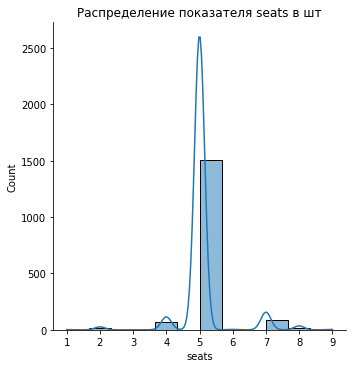

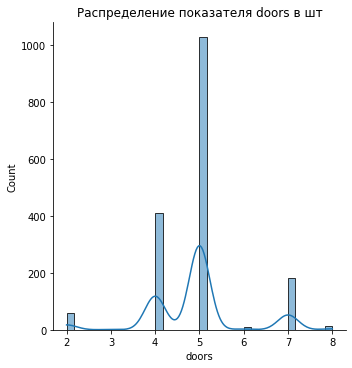

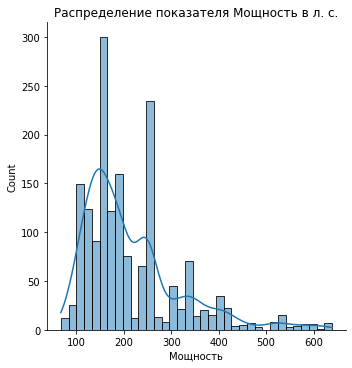

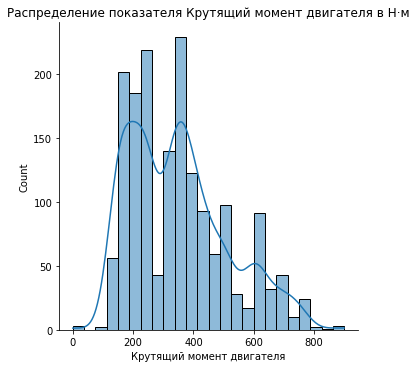

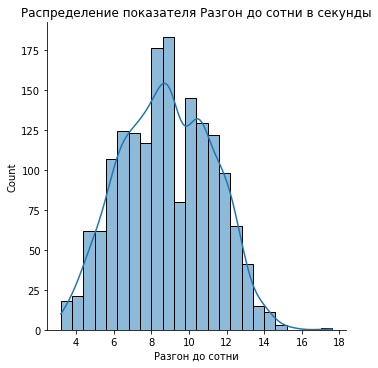

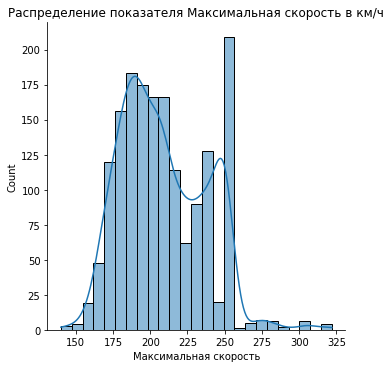

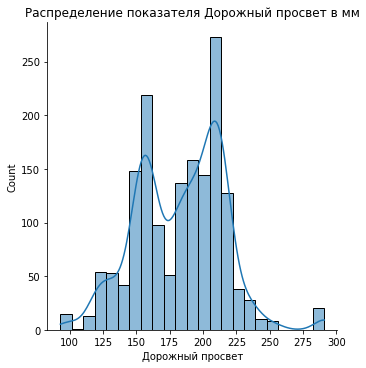

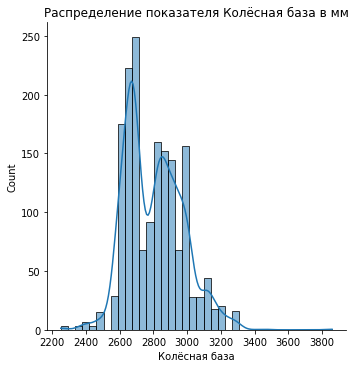

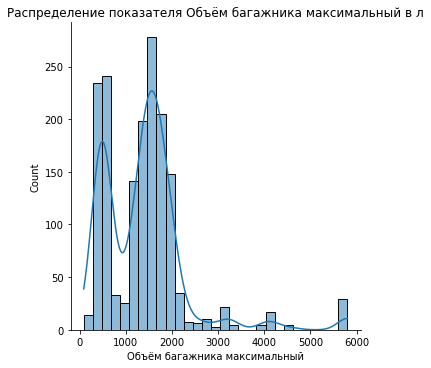

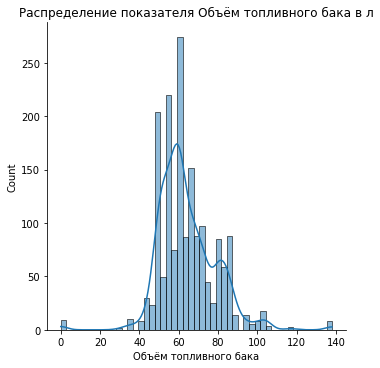

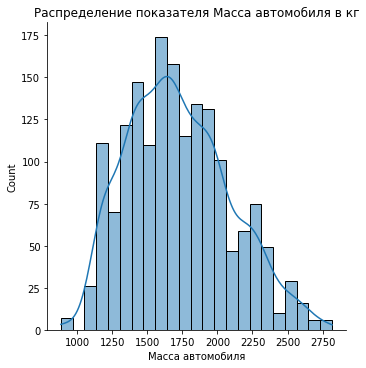

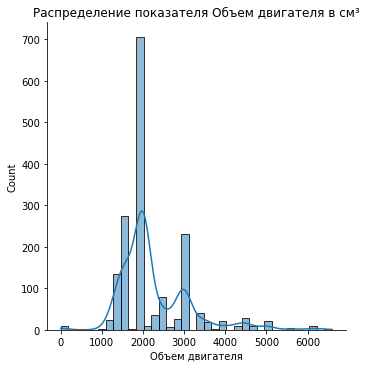

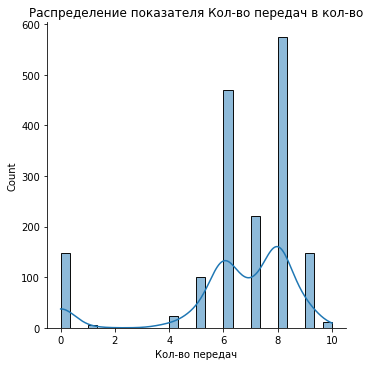

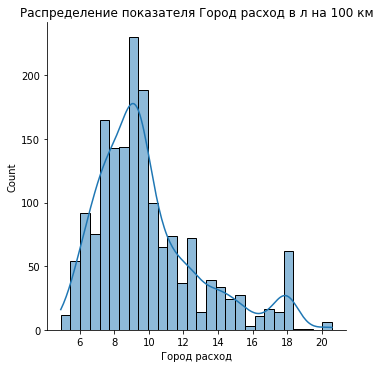

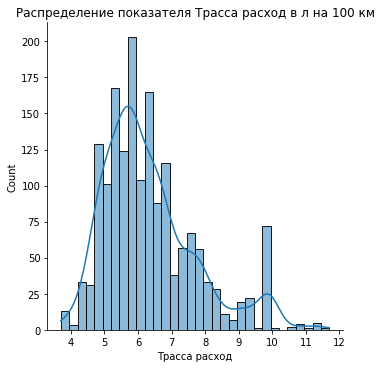

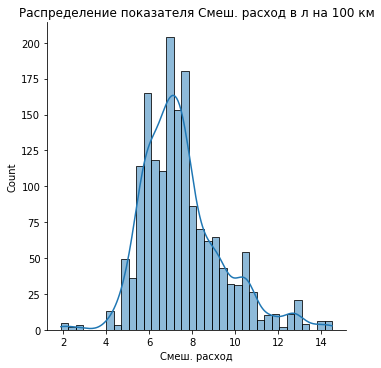

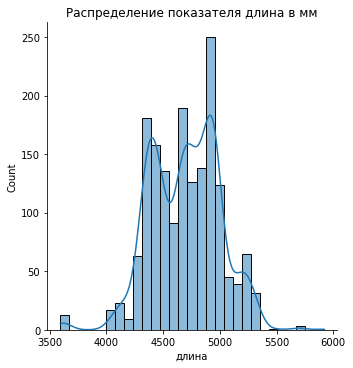

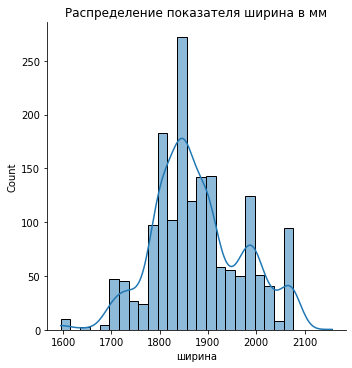

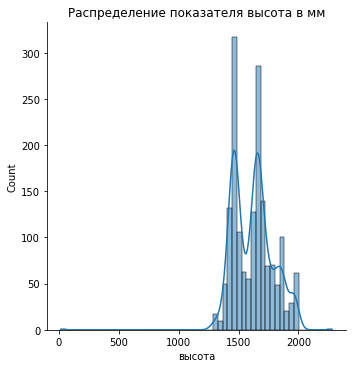

In [133]:
def print_hisplot(column_name):
    sns.displot(data[column_name], kde=True)
    plt.title('Распределение показателя {} в {}'.format(column_name, column_dict[column]))
    plt.show()
    
column_dict = {'seats': 'шт', 'doors':'шт', 'Мощность': 'л. с.', 'Крутящий момент двигателя': 'Н·м', 'Разгон до сотни': 'секунды',  'Максимальная скорость': 'км/ч', 'Дорожный просвет': 'мм','Колёсная база': 'мм',
                     'Объём багажника максимальный': 'л','Объём топливного бака': 'л', 'Масса автомобиля':'кг', 'Объем двигателя': 'см³', 'Кол-во передач': 'кол-во', 'Город расход': 'л на 100 км', 'Трасса расход': 'л на 100 км', 'Cмеш. расход': 'л на 100 км',
              'длина': 'мм', 'ширина': 'мм', 'высота': 'мм'}
    
for column in column_dict:
    print_hisplot(column)

<AxesSubplot:>

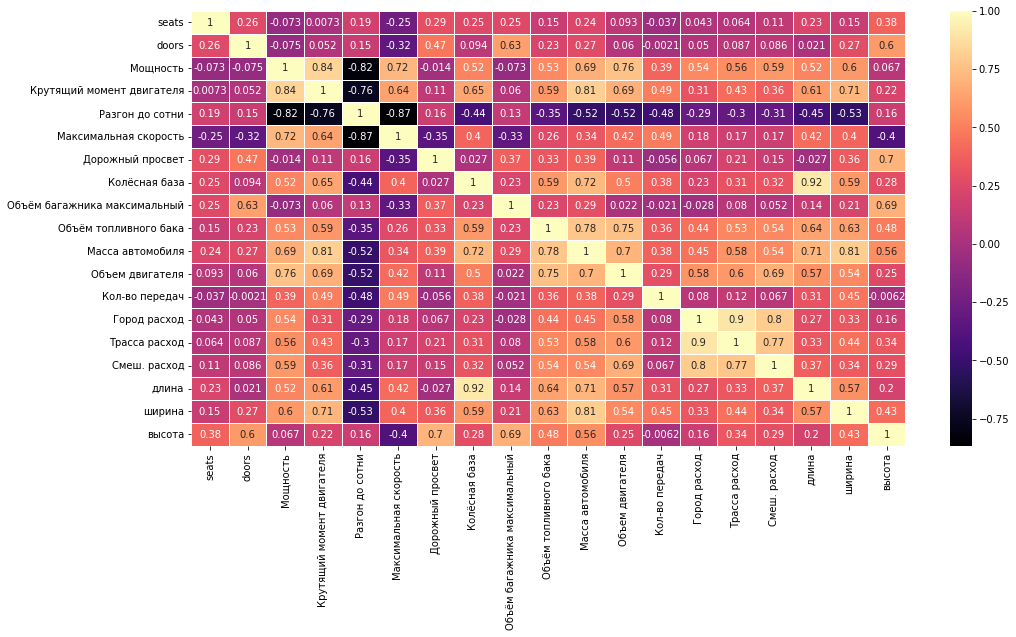

In [200]:
plt.figure(figsize = (16,8))
sns.heatmap(data.corr(), annot=True, linewidths=1, cmap="magma")

### Подсчитываю главные классы машин

{'Седан': 416, 'Хэтчбек': 128, 'Кроссовер': 754, 'Внедорожник': 174, 'Купе': 43}


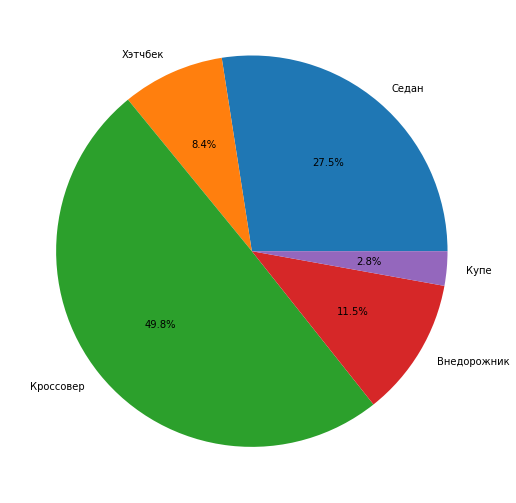

In [194]:
import re

regexp_sedan = re.compile('[сС]едан')
regexp_hatchback = re.compile('[хХ]этчбек')
regexp_crossover = re.compile('[кК]россовер')
regexp_truck = re.compile('[вВ]недорожник')
regexp_coupe = re.compile('[кК]упе')

count_type_car = {'Седан': 0, 'Хэтчбек': 0, 'Кроссовер': 0, 'Внедорожник': 0, 'Купе': 0}

for i in data['type_car']:
    if regexp_sedan.search(i):
        count_type_car['Седан'] += 1
        
    elif regexp_hatchback.search(i):
        count_type_car['Хэтчбек'] += 1
        
    elif regexp_crossover.search(i):
        count_type_car['Кроссовер'] += 1
        
    elif regexp_truck.search(i):
        count_type_car['Внедорожник'] += 1
        
    elif regexp_coupe.search(i):
        count_type_car['Купе'] += 1

print(count_type_car)



fig, ax = plt.subplots(figsize=(9, 9))
    
values = list(count_type_car.values())
labels = list(count_type_car.keys())
    
ax.pie(values, labels=labels, autopct='%1.1f%%')
    
plt.show()

`Подсчитаю и выведу в круговых диаграммах номинальные  данные`

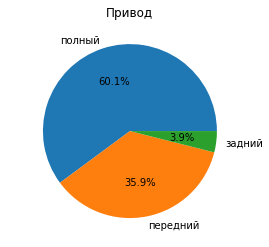

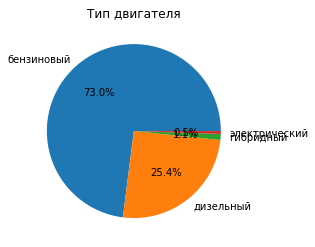

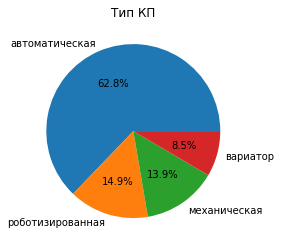

In [191]:
def pie_plot(column_name):
    fig,ax = plt.subplots(1)
    
    data[column_name].value_counts().plot.pie(autopct='%1.1f%%')  
    
    plt.title('{}'.format(column_name))
    ax.set_ylabel(' ')
    
    plt.show()

    
for i in ['Привод', 'Тип двигателя', 'Тип КП']:
    pie_plot(i)